In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from openLoop.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)

import openLoop.math.dispatched as dmath 
#import openLoop.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib


In [3]:
import openLoop.utilities.version as version
print(version.foundations_version())

from openLoop.utilities.np import logspaced

from openLoop import optics
from openLoop import base 
from openLoop import signals 
from openLoop import system
from openLoop import readouts 
from openLoop import mechanical

b'2017-05-29 23:05:35 -0400 (28a71c6d4abb288648a0b6405e8b3239a46ab42f)'


In [4]:
import pickle

In [5]:
#with open('./HTTS_UL_UL.pckl', 'rb') as F:
with open('./LIGOX_mat.pckl', 'rb') as F:
    data = declarative.Bunch(pickle.load(F))

In [6]:
from openLoop.system import DAG_algorithm
from openLoop.system import graph_algorithm
import collections

In [7]:
keys = set()
mat_sub_one = dict()
seq = collections.defaultdict(set)
req = collections.defaultdict(set)
for (k1, k2), edge in data.coupling_matrix.items():
    keys.add(k1)
    keys.add(k2)
    seq[k1].add(k2)
    req[k2].add(k1)
    if k1 == k2:
        mat_sub_one[k1, k2] = edge - 1
    else:
        mat_sub_one[k1, k2] = edge

for k in keys:
    if (k, k) not in mat_sub_one:
        mat_sub_one[k, k] = -1
        seq[k].add(k)
        req[k].add(k)
        
inputs_set = set([data.AC_index[0]])
outputs_set = set([data.AC_index[1]])

sbunch = DAG_algorithm.inverse_solve_inplace(
#sbunch = graph_algorithm.inverse_solve_inplace(
    seq = seq,
    req = req,
    inputs_set = inputs_set,
    outputs_set = outputs_set,
    edge_map = mat_sub_one,
    verbose = True,
)


TRIVIAL STAGE, REMAINING 640
TRIVIAL STAGE, REMAINING 42
BADGUY STAGE, REMAINING 42
MY NODE:  3451
MIN_MAX:  3451 3451
REL LARGER:  0.75
RVEC:  [0.99991785639256525, 9.2065968905677471e-06, 9.2065968905677471e-06, 3.7152528053124421e-06, 0.99998551544017478, 0.00080555200964877154]
R:  2 6 True True
4 4 3451
CVEC:  [0.8163214035020071, 0.0020800402608765795, 0.81608746126962628, 3.0320537630230472e-06, 0.79168543259096402]
[ True False  True False  True] 4 3
C:  3 5 True False
NORM:  78.1664115711 109.770538055
Using ROW Operations
MUST USE HOUSEHOLDER 2x
MY NODE:  4551
MIN_MAX:  4551 4551
REL LARGER:  0.8
RVEC:  [0.99999999999751576, 0.99979816143857958]
R:  2 2 True True
1 1 4551
CVEC:  [0.0020460702325900961, 0.9999999999975151, 0.0020460702325900961, 0.0029497091239989582, 0.99979757852687501]
[False  True False False  True] 1 2
C:  2 5 True False
NORM:  49.7742639551 49.8674269826
Using ROW Operations
MUST USE HOUSEHOLDER 2x
MY NODE:  4911
MIN_MAX:  4911 4911
REL LARGER:  0.0
RVEC

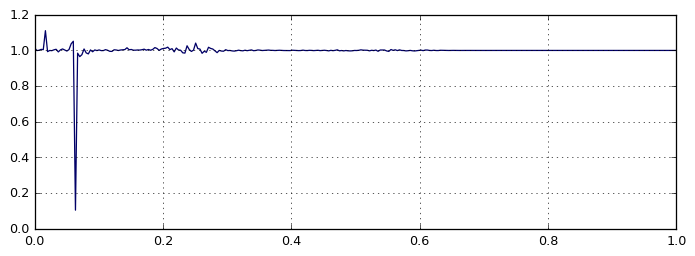

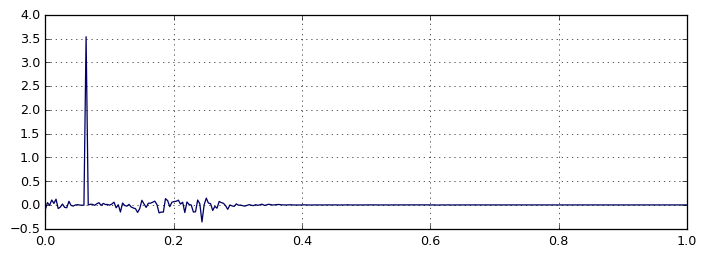

In [8]:

X =np.linspace(0, 1, data.AC_solution.shape[0])
axB = mplfigB()
axB.ax0.semilogy(X, abs(data.AC_solution))
axB.ax0.semilogy(X, abs(sbunch.edge_map[data.AC_index]))

axB = mplfigB()
axB.ax0.plot(X, abs(sbunch.edge_map[data.AC_index]/data.AC_solution))

axB = mplfigB()
axB.ax0.plot(X, ((.4 + np.angle(sbunch.edge_map[data.AC_index]/data.AC_solution)) % (2 * np.pi) - .4))

In [9]:
sbunch.edge_map[data.AC_index]

array([  3.02199658e+03 +3.79139367e+05j,
         5.80915799e+03 +5.94232829e+05j,
         1.40136877e+04 +1.03366933e+06j,
         4.97431603e+04 +2.16437751e+06j,
         3.96578921e+05 +6.83021250e+06j,
         5.88904147e+07 +7.60689048e+07j,
         1.76395388e+06 +2.11139206e+07j,
         1.03933809e+04 +3.66799617e+06j,
        -7.17019011e+03 +1.40555677e+06j,
        -5.05459331e+03 +7.07143553e+05j,
        -3.26597272e+03 +4.04776146e+05j,
        -2.18372592e+03 +2.47568311e+05j,
        -1.50373625e+03 +1.55993831e+05j,
        -1.05657281e+03 +9.85497205e+04j,
        -7.44231682e+02 +6.07981063e+04j,
        -5.16342847e+02 +3.54257064e+04j,
        -3.42029711e+02 +1.84634167e+04j,
        -2.03997259e+02 +7.66552269e+03j,
        -9.08752169e+01 +1.74789272e+03j,
         4.98241851e+00 +4.75430597e+00j,
         8.89348840e+01 +2.10765226e+03j,
         1.65513170e+02 +7.99853486e+03j,
         2.38373090e+02 +1.78367133e+04j,
         3.11975128e+02 +3.1980379